# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Procesamiento de Lenguaje Natural**

### Tecnológico de Monterrey

### Prof. Luis Eduardo Falcón Morales

## Adtividad Semana 6 y 7

### **Modelado de tópicos - LSI/LDA**

#### **Nombres y matrículas de los integrantes del equipo:**



*   A01705317 - Miguel Ángel Marines Olvera
*   A01273366 - Salvador Martínez Morales
*   A01740049 - Jesús Mario Martínez Díaz
*   A01795167 - Eduardo Selim Martínez Mayorga
*   A01794882 - Francisco Marmolejo Martinez


###En la actividad de esta semana trabajarás en equipos en el tema de modelado de temas (topic modeling).

##**Entorno de Trabajo**

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import json
import pandas as pd

import nltk
from nltk.corpus import stopwords

from nltk.stem import LancasterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import TruncatedSVD

import gensim
import gensim.corpora as corpora
import gensim.models.ldamulticore

import matplotlib.pyplot as plt
import seaborn as sns

##**Pregunta - 1:**

Descarga el archivo noticiasTopicModeling.txt que se encuentra en Canvas. Este archivo consiste en 5658 noticias de varios periódicos de España. El archivo de texto es una lista en el siguiente formato:

[{“titular”:”Encabezado“, “texto”:”Cuerpo”}, ... , {“titular”:”Encabezado”,”texto”:”Cuerpo”}]

Donde “titular” es el encabezado de la noticia y “texto” es el cuerpo del texto de dicha noticia. En particular en esta actividad trabajarás solamente con los cuerpos de las noticias, sin incluir los encabezados. Carga dicho archivo y genera un DataFrame de Pandas llamado “df” y que contiene una única columna llamada “noticia” con 5658 renglones formados por los cuerpos de las noticias.


In [3]:
with open('noticiasTopicModeling.txt', 'r', encoding='utf-8') as file:
    data = json.load(file)

noticias = [item['texto'] for item in data]

df = pd.DataFrame(noticias, columns=['noticia'])

In [4]:
len(df) == 5658

True

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5658 entries, 0 to 5657
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   noticia  5658 non-null   object
dtypes: object(1)
memory usage: 44.3+ KB


In [6]:
df.head()

,noticia
0,"""España ha dejado de ser católica"", decía Manu..."
1,El clima de crispación social en Ceuta ha lleg...
2,El Gobierno ha alegado la suspensión de plazos...
3,"Puedes mandar tu pregunta, sugerencia o queja ..."
4,Panamá debe entregar esta semana a la Corte In...


In [7]:
print(df)

                                                noticia
0     "España ha dejado de ser católica", decía Manu...
1     El clima de crispación social en Ceuta ha lleg...
2     El Gobierno ha alegado la suspensión de plazos...
3     Puedes mandar tu pregunta, sugerencia o queja ...
4     Panamá debe entregar esta semana a la Corte In...
...                                                 ...
5653  El juez del caso Villarejo, Manuel García-Cast...
5654  España se acerca a los 260.000 casos de COVID-...
5655  Transferencias, préstamos y condiciones. "Nunc...
5656  El 14 de marzo, ante la declaración del estado...
5657  Madrid, 1 sep (EFE).- Finalmente, septiembre h...

[5658 rows x 1 columns]


##**Pregunta - 2:**

Realiza un proceso de limpieza. Aplica el preprocesamiento que consideres adecuado para texto en español. Recuerda que el objetivo es identificar los tokens (palabras) que describan mejor la distribución de cada tema.

NOTA: Recuerda que esta es una técnica no supervisada, por lo que no requerimos hacer una partición de los datos.











In [8]:
nltk.download('stopwords')

stopwords = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /home/mitnik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
print(stopwords)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [10]:
def limpieza_tokenizacion(doc):

  tokens = doc.lower()

  tokens = ''.join(char if char.isalpha() or char.isspace() else ' ' for char in tokens)

  tokens = tokens.split()

  tokens = [token for token in tokens if len(token) > 1]

  tokens = [token for token in tokens if token not in stopwords]

  ls = LancasterStemmer()
  #tokens = [ls.stem(token) for token in tokens]

  return tokens

In [11]:
df_clean = [limpieza_tokenizacion(registro) for registro in df['noticia']]

In [12]:
for x in df_clean[0:5]:
  print(x)

['españa', 'dejado', 'ser', 'católica', 'decía', 'manuel', 'azaña', 'comienzo', 'segunda', 'república', 'aquel', 'congreso', 'diputados', 'aprobó', 'leyes', 'laicistas', 'metáfora', 'dejó', 'ser', 'católica', 'papel', 'ley', 'creencias', 'buena', 'parte', 'pueblo', 'migración', 'integración', 'europea', 'programa', 'vox', 'europa', 'saber', 'españa', 'domingo', 'noviembre', 'dejado', 'ser', 'excepción', 'europa', 'potencia', 'extrema', 'derecha', 'parlamento', 'metáfora', 'pues', 'precisamente', 'excepcional', 'tener', 'dictadura', 'mediados', 'setenta', 'dictador', 'aún', 'mausoleo', 'después', 'años', 'muerto', 'existía', 'tal', 'cosa', 'portugal', 'grecia', 'italia', 'alemania', 'países', 'dictaduras', 'fascistas', 'españa', 'pasó', 'portugal', 'italia', 'alemania', 'derrotó', 'fascismo', 'franquismo', 'murió', 'cama', 'harakiri', 'cortes', 'franquistas', 'ruptura', 'régimen', 'sino', 'reforma', 'nació', 'nuevo', 'país', 'sino', 'país', 'mutó', 'ley', 'ley', 'aun', 'así', 'españa', 

In [13]:
DTM = []

for doc in df_clean:
    tmp = ' '.join(doc)
    DTM.append(tmp)

In [14]:
DTM[0]

'españa dejado ser católica decía manuel azaña comienzo segunda república aquel congreso diputados aprobó leyes laicistas metáfora dejó ser católica papel ley creencias buena parte pueblo migración integración europea programa vox europa saber españa domingo noviembre dejado ser excepción europa potencia extrema derecha parlamento metáfora pues precisamente excepcional tener dictadura mediados setenta dictador aún mausoleo después años muerto existía tal cosa portugal grecia italia alemania países dictaduras fascistas españa pasó portugal italia alemania derrotó fascismo franquismo murió cama harakiri cortes franquistas ruptura régimen sino reforma nació nuevo país sino país mutó ley ley aun así españa parecía vacunada si años franquismo sido bastantes llegado irrupción posfranquismo tras ser actores fundamentales gobiernos autonómicos locales pp ciudadanos españa dejado ser excepción aunque alianza popular manuel fraga bebiera franquismo sociológico fuerza nueva blas piñar búnker fran

#**Parte 1: Indexación semántica latente (LSI):**


##**Pregunta - 3:**

Encontrar la matriz Tf-idf de la columna de noticias. Despliega los primeros 5 renglones con algunas de sus columnas con sus nombres, donde las columnas son los tokens. ¿Cuál es el significado de cada renglón? ¿Y el significado de cada columna?

**Renglones**

Cada renglón de la matriz representa un documento individual del corpus. En el contexto de esta actividad cada fila en la matriz TF-IDF corresponde a una noticia.

**Columnas**

Cada columna de la matriz representa un token (palabra) del vocabulario extraído de todo el corpus. En el contexto de esta actividad cada columna en la matriz TF-IDF corresponde a un token (palabra) del vocabulario obtenido de las noticias.

**Valores Numéricos**

Los valores indican la importancia relativa de un token (palabra) en un documento específico dentro del corpus de documentos. El valor es la relación Documento-Token (fila-columna).

In [15]:
tfidf = TfidfVectorizer()

tfidf_matrix = tfidf.fit_transform(DTM)

In [16]:
tfidf_matrix_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
tfidf_matrix_df.head()

,aa,aaas,aac,aahjko,aai,aaim,aaiún,aalla,aamir,aamma,...,張雨軒,赵立坚,ｖａｐｏｒｗａｖｅ,𝐆𝐨𝐫𝐫𝐨𝐭𝐱𝐚𝐭𝐞𝐠𝐢,𝐌𝐢𝐫𝐞𝐧,𝔻𝕒𝕧𝕚𝕕,𝔾𝕒𝕣𝕔𝕚𝕒,𝗿𝗲𝗴𝗿𝗲𝘀𝗼,𝙺𝚊𝚕𝚕𝚎𝚛𝚐𝚒𝚜,𝙺𝚘𝚜𝚝𝚊𝚜
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
del tfidf_matrix_df

##**Pregunta - 4:**

Aplica el método de descomposición de valores singulares truncado a la matriz Tf-idf anterior con 10 componentes y obtener el gráfico de la importancia relativa de estas.

In [18]:
r = 10

lsi_obj = TruncatedSVD(n_components=r, n_iter=100, random_state=42)

tfidf_lsi = lsi_obj.fit_transform(tfidf_matrix)

Sigma = lsi_obj.singular_values_

V_T = lsi_obj.components_.T

In [19]:
sigmas = lsi_obj.singular_values_

print(sigmas)

[13.39516187  7.5059885   5.9396734   5.83875465  5.57549817  5.40222374
  4.99094062  4.78179059  4.70589223  4.56605987]


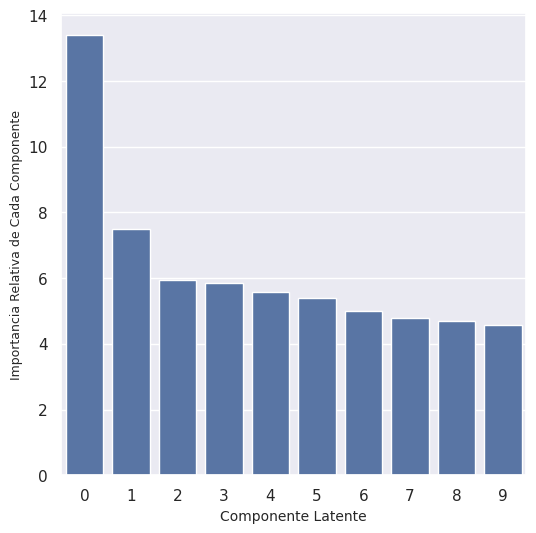

In [20]:
sns.set(rc={'figure.figsize':(6,6)})
chart = sns.barplot(x=list(range(len(Sigma))), y = Sigma )
chart.set_xlabel('Componente Latente', fontdict={'size': 10})
chart.set_ylabel('Importancia Relativa de Cada Componente', fontdict={'size': 9})
plt.show()

##**Pregunta - 5:**

Obtener la matriz tokens-temas (term-topic) a partir de la matriz 𝑉􏰀 de la descomposición SVD. Despliega sus primeros 5 renglones donde se incluya el nombre de las columnas.

In [21]:
lsi_term_topic = V_T

print(lsi_term_topic.shape)

(100514, 10)


In [22]:
token_names = list(tfidf.get_feature_names_out())

#print(token_names)

In [23]:
term_topic_matrix = pd.DataFrame(data=lsi_term_topic,
                                 index=token_names,
                                 columns=[f'Concepto_Latente_{r}' for r in range(0,V_T.shape[1])]
                                )

print(term_topic_matrix.shape)

(100514, 10)


In [24]:
term_topic_matrix.head()

,Concepto_Latente_0,Concepto_Latente_1,Concepto_Latente_2,Concepto_Latente_3,Concepto_Latente_4,Concepto_Latente_5,Concepto_Latente_6,Concepto_Latente_7,Concepto_Latente_8,Concepto_Latente_9
aa,0.000145,0.000005,-0.000251,-0.000041,0.000129,2.279535e-04,0.000040,-0.000009,-0.000329,0.000082
aaas,0.000029,0.000013,-0.000068,0.000016,0.000021,7.689747e-07,-0.000099,0.000016,0.000032,-0.000037
aac,0.000155,-0.000122,-0.000208,0.000040,0.000278,2.356127e-05,0.000437,0.000242,-0.000654,0.000276
aahjko,0.000145,0.000241,-0.000058,-0.000244,-0.000124,-1.420969e-04,0.000654,-0.000276,0.000997,-0.000035
aai,0.000064,-0.000011,-0.000059,0.000203,-0.000002,4.684014e-05,0.000083,0.000045,-0.000030,-0.000086


##**Pregunta - 6:**

Con base a la cantidad de conceptos latentes que determinaste en el ejercicio anterior, obtener cada uno de sus gráficos con sus 10 términos/tokens más importantes. ¿Cómo describirías cada uno de dichos conceptos latentes? ¿Se identifican claramente las temáticas de cada uno de ellos?

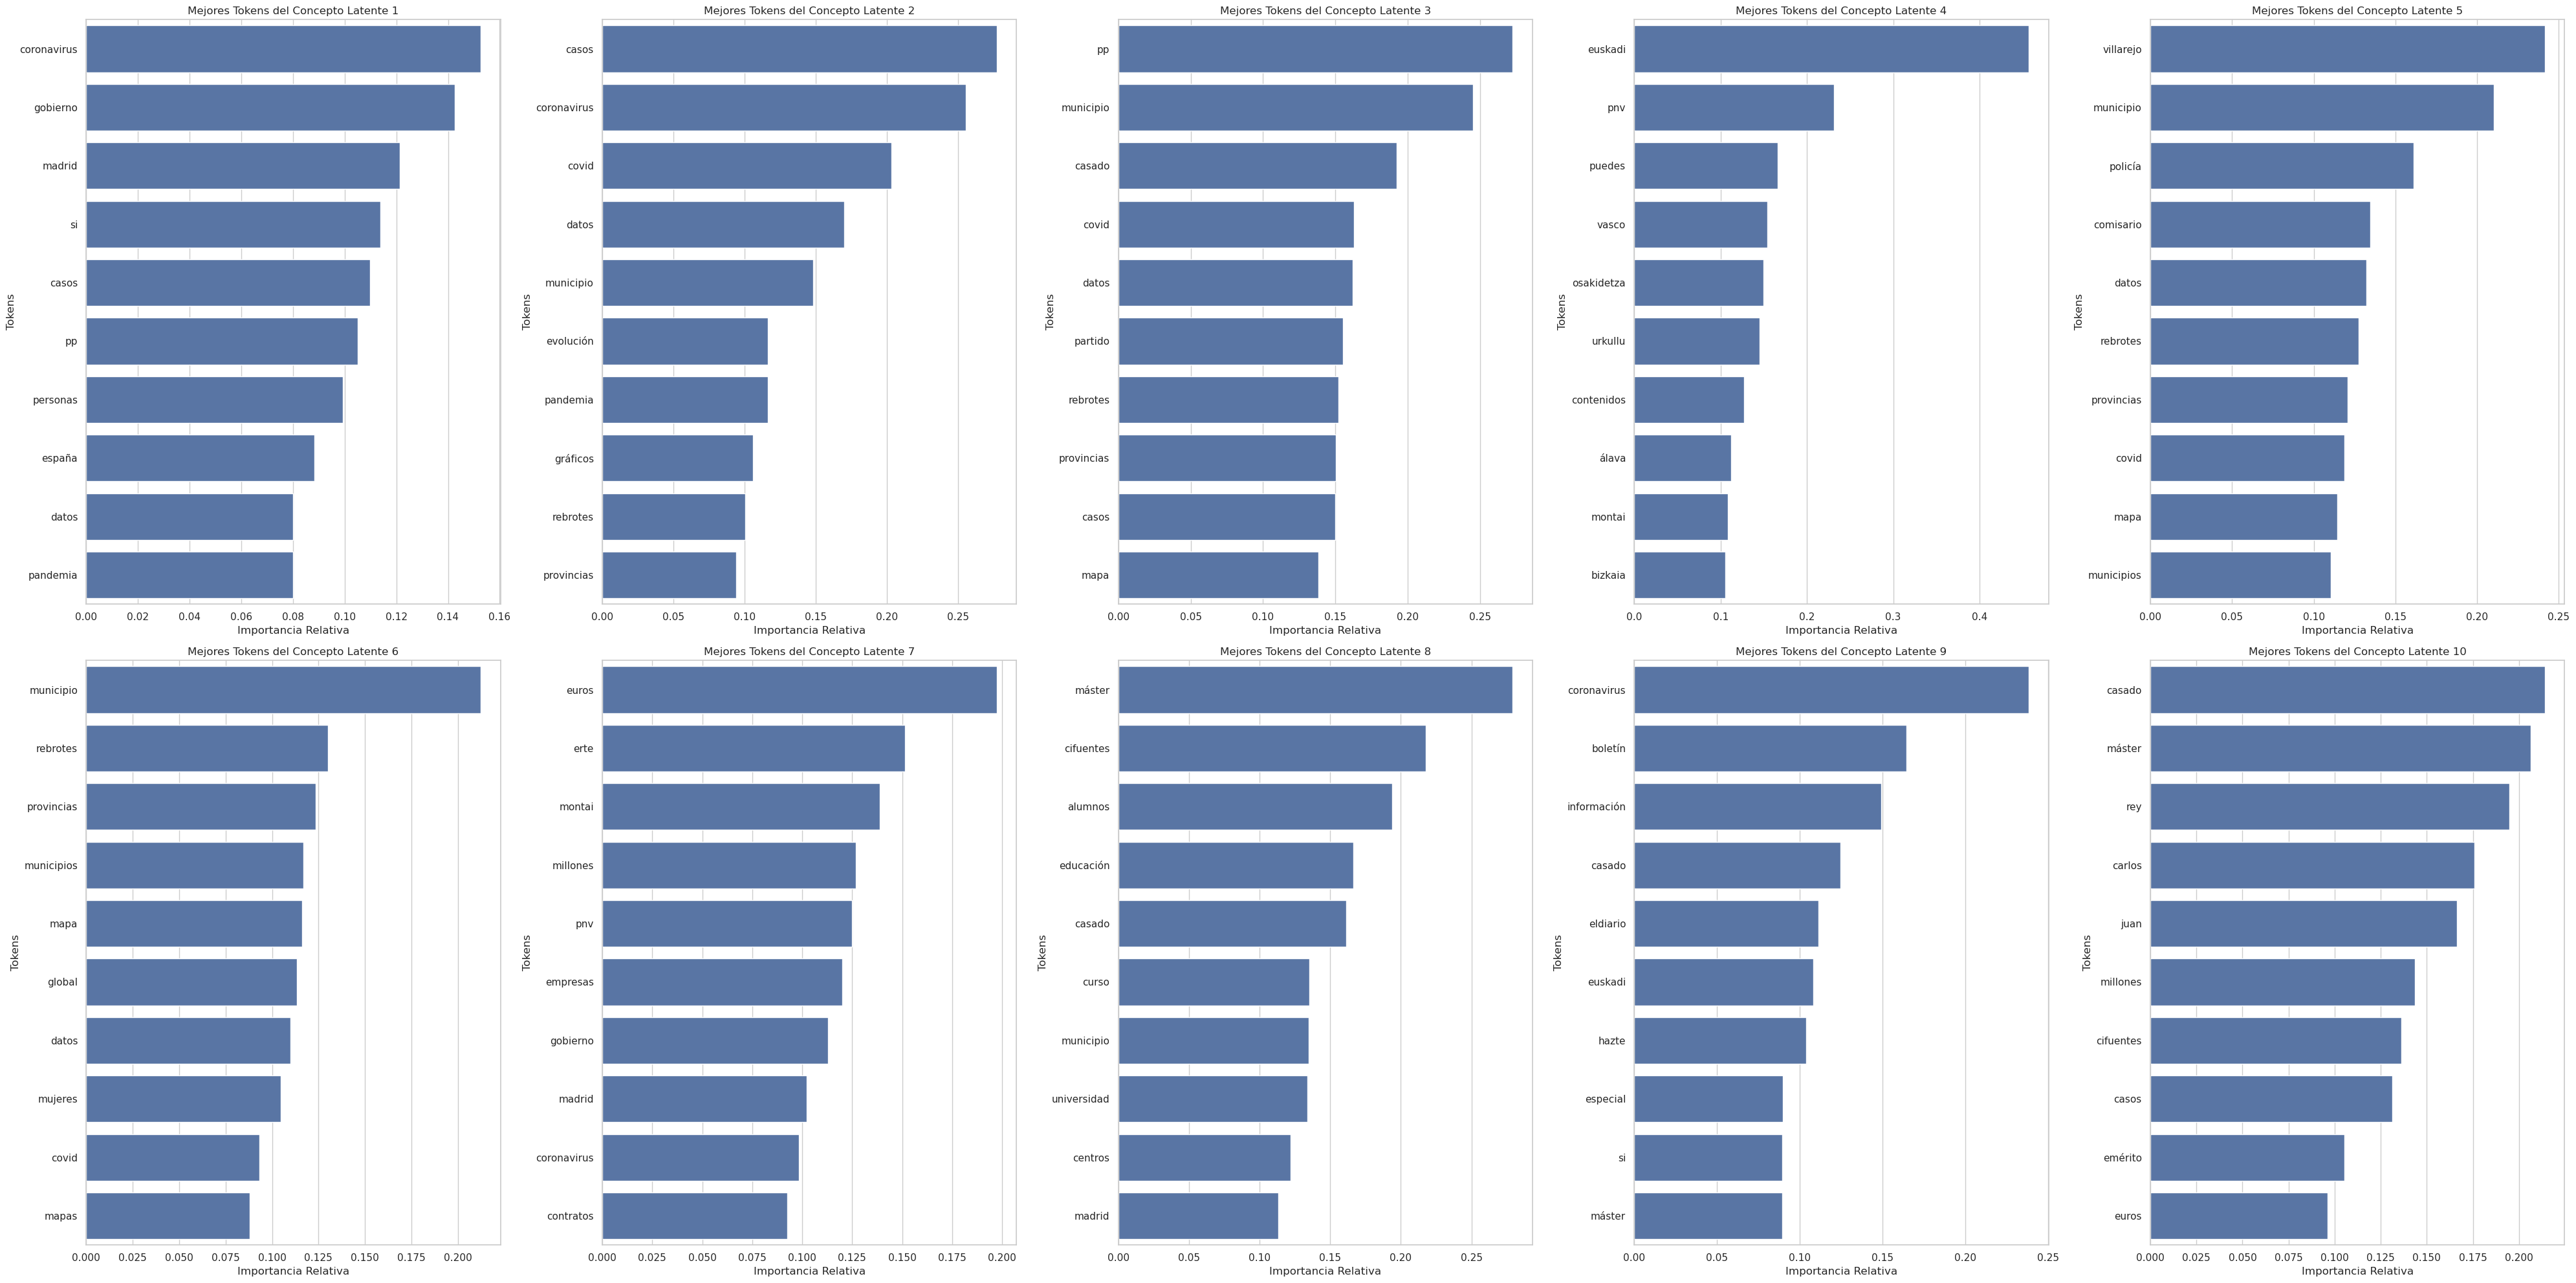

In [25]:
sns.set(style="whitegrid")

num_conceptos = 10

top_w = 10

fig, axes = plt.subplots(2, 5, figsize=(40, 20), sharex=False)

for i in range(num_conceptos):

    data = term_topic_matrix[f'Concepto_Latente_{i}']
    data = data.sort_values(ascending=False)
    top_w_matrix = data[:top_w]

    ax = axes[i // 5, i % 5]

    sns.barplot(x=top_w_matrix.values, y=top_w_matrix.index, ax=ax)
    ax.set_title(f'Mejores Tokens del Concepto Latente {i+1}')
    ax.set_xlabel('Importancia Relativa')
    ax.set_ylabel('Tokens')

plt.tight_layout()

plt.show()

**¿Cómo se describiría cada uno de dichos conceptos latentes? ¿Se identifican claramente las temáticas de cada uno de los conceptos latentes?**

Cada uno de los conceptos latentes está descrito por la importancia relativa de los diez token que más valor tienen dentro del concepto. Las palabras con mayor importancia relativa ayudan a definir cuál es el la temática de cada uno de los conceptos latentes.

En ocho de los diez conceptos latentes se pueden identificar las temáticas:

1.  **Concepto Latente 1:** Pandemia de coronavirus en España.
2.  **Concepto Latente 2** Evolución de la pandemia de coronavirus a nivel local y regional.
3.  **Concepto Latente 3:** Gestión política y administrativa de la pandemia.
4.  **Concepto Latente 4:** Política del País Vasco.
5.  **Concepto Latente 5:** Policia y pandemia.
6.  **Concepto Latente 6:** Covid a nivel local, nacional e internacional, además del género.
7.  **Concepto Latente 7:** El coronavirus y las empresas y los contratos y la economía.
8.  **Concepto Latente 8:** Educación
9.  **Concepto Latente 9:** No es clara la temática.
10.  **Concepto Latente 10:** No es clara la temática.


#**Parte 2: Asignación de Dirichlet Latente (LDA):**

##**Pregunta - 7:**

Utiliza la librería Gensim para implementar ahora la técnica de LDA. Revisa la documentación correspondiente y aplica de preferencia el modelo paralelizable:

https://radimrehurek.com/gensim/models/ldamodel.html

https://radimrehurek.com/gensim/models/ldamulticore.html


In [26]:
id2word = corpora.Dictionary(df_clean)

corpus = [id2word.doc2bow(doc) for doc in df_clean]

[[(id2word[id], fre) for id, fre in cor] for cor in corpus[:2]]

[[('abascal', 1),
  ('abril', 1),
  ('actores', 1),
  ('afd', 1),
  ('ahora', 1),
  ('alemanes', 2),
  ('alemania', 2),
  ('alianza', 1),
  ('amigos', 1),
  ('amplio', 1),
  ('apresurado', 1),
  ('aprobó', 1),
  ('aquel', 1),
  ('así', 3),
  ('aun', 1),
  ('aunque', 5),
  ('aurora', 1),
  ('austriaca', 1),
  ('autonómicos', 1),
  ('azaña', 1),
  ('años', 2),
  ('aún', 2),
  ('bastantes', 1),
  ('bebiera', 1),
  ('blas', 1),
  ('buena', 1),
  ('búnker', 1),
  ('cama', 1),
  ('catalunya', 1),
  ('católica', 2),
  ('cierto', 1),
  ('ciudadanos', 1),
  ('clásicos', 1),
  ('comienzo', 1),
  ('congreso', 1),
  ('cortes', 1),
  ('cosa', 1),
  ('creencias', 1),
  ('crisis', 2),
  ('cuyo', 1),
  ('debajo', 1),
  ('decía', 1),
  ('deja', 1),
  ('dejado', 3),
  ('dejó', 1),
  ('democrática', 1),
  ('demócratas', 1),
  ('derecha', 7),
  ('derrotó', 1),
  ('despeñarse', 1),
  ('después', 2),
  ('dictador', 1),
  ('dictadura', 1),
  ('dictaduras', 1),
  ('diputados', 1),
  ('domingo', 1),
  ('dorada

In [27]:
lda_model = gensim.models.ldamulticore.LdaMulticore(
    corpus=corpus,
    id2word=id2word,
    num_topics=10,
    chunksize=5,
    passes=10,
    alpha=0.2,
    eta=0.2,
    workers=3
)

In [28]:
lda_model.print_topics(num_topics=10, num_words=10)

[(0,
  '0.006*"ciudad" + 0.005*"etiquetas" + 0.005*"según" + 0.005*"galicia" + 0.005*"ayuntamiento" + 0.005*"castilla" + 0.005*"personas" + 0.005*"junta" + 0.004*"barcelona" + 0.004*"centro"'),
 (1,
  '0.017*"educación" + 0.016*"universidad" + 0.012*"alumnos" + 0.012*"curso" + 0.010*"máster" + 0.007*"trump" + 0.007*"cifuentes" + 0.006*"profesores" + 0.006*"clases" + 0.006*"aulas"'),
 (2,
  '0.011*"millones" + 0.008*"euros" + 0.005*"economía" + 0.004*"empresas" + 0.004*"empresa" + 0.004*"miguel" + 0.004*"año" + 0.004*"país" + 0.004*"países" + 0.004*"europea"'),
 (3,
  '0.013*"coronavirus" + 0.008*"casos" + 0.008*"si" + 0.007*"personas" + 0.006*"pandemia" + 0.006*"cada" + 0.006*"covid" + 0.006*"datos" + 0.006*"días" + 0.005*"salud"'),
 (4,
  '0.011*"policía" + 0.008*"guerra" + 0.006*"villarejo" + 0.006*"civil" + 0.006*"dos" + 0.005*"interior" + 0.004*"comisario" + 0.004*"memoria" + 0.004*"años" + 0.004*"operación"'),
 (5,
  '0.009*"trabajo" + 0.009*"trabajadores" + 0.008*"social" + 0.007

##**Pregunta - 8:**


Con base a esta técnica ¿qué cantidad de tópicos consideras que es la más adecuada? Compara tus resultados con el método LSI. ¿Qué encuentras de coincidencias y diferencias? ¿Cuál consideras puede ser el mejor resultado, es decir, cuál consideras puede ser la mejor cantidad de tópicos a considerar?

**Con base a la técnica LDA ¿qué cantidad de tópicos se considera que es la más adecuada?**

La cantidad de diez tópicos parece ser la adecuada, sin embargo un número mayor de tópicos podría ser de igual manera factible, ya que la cantidad de noticias con las que se cuenta es bastante grande de la cual se pueden identificar multiples tópicos.

**Se comparan los resultados con el método LSI.**

**¿Qué se encuentra de coincidencias y diferencias?**

Al comparar los resultados obtenidos con el método LSI a los resultados obtenidos con LDA se puede notar las coincidencias en la identificación de los temas:

1. Pandemia Coronavirus
2. Política en España
3. Policia
4. Economía
5. Política del País Vasco

Sin embrago, también se encontraron diferencias en la identificación de los temas:

1. Educación (LSI)
2. Migración (LDA)

**¿Cuál se considera puede ser el mejor resultado, es decir, cuál se considera puede ser la mejor cantidad de tópicos a considerar?**

La cantidad de diez tópicos parece ser la adecuada, sin embargo un número mayor de tópicos podría ser de igual manera factible, ya que la cantidad de noticias con las que se cuenta es bastante grande de la cual se pueden identificar multiples tópicos.

##**Pregunta - 9:**

Incluye tus conclusiones finales de la actividad.

En esta actividad de procesamiento de lenguaje natural, se exploraron dos técnicas poderosas para el Modelado de Temas: LSI (Indexación Semántica Latente) y LDA (Asignación Latente de Dirichlet). Al aplicar estas metodologías a un conjunto de noticias en español, se logró obtener patrones subyacentes y descubrir los temas principales que abarcan el corpus de noticias.

Mediante LSI, se pudo reducir la dimensionalidad del conjunto de datos y capturar la estructura latente de las noticias. Esto permitió identificar relaciones semánticas entre palabras y temas, lo que dio una visión más clara de la información contenida en el corpus o los documentos de noticias.

Por otro lado, la aplicación de LDA permitió modelar la distribución de temas dentro de las noticias y asignar palabras a esos temas de manera probabilística. Esta técnica brindó una comprensión más profunda de cómo se agrupan las palabras en temas coherentes y cómo estos temas se entrelazan en el conjunto de noticias.

El Modelado de Temas mediante LSI y LDA sirvió como una herramienta poderosa para analizar y comprender grandes conjuntos de datos de texto. Estas técnicas no solo permitieron descubrir temas relevantes y ocultos dentro del corpus de noticias, sino que también ayudaron a extraer información valiosa y a obtener una comprensión más profunda de la naturaleza del contenido de las noticias.